<a href="https://www.kaggle.com/code/burcusevinc/sleep-health-lifestyle?scriptVersionId=256030972" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

Key Features:

Comprehensive Sleep Metrics: Includes details on sleep duration, quality of sleep, and associated influencing factors.
Lifestyle Factors: Captures physical activity levels, stress levels, and BMI categories to assess overall lifestyle patterns.
Cardiovascular Health: Contains data on blood pressure and heart rate, essential for analyzing correlations with sleep and lifestyle.
Sleep Disorder Analysis: Identifies individuals with common sleep disorders such as Insomnia and Sleep Apnea.
Dataset Columns:

Person ID: A unique identifier for each individual.
Gender: Gender of the individual (Male/Female).
Age: Age of the individual in years.
Occupation: The profession or employment status of the individual (e.g., Office Worker, Manual Labor, Student).
Sleep Duration (hours): Total hours of sleep per day.
Quality of Sleep (scale: 1-10): A subjective rating of sleep quality, ranging from 1 (poor) to 10 (excellent).
Physical Activity Level (minutes/day): Time spent on physical activity daily in minutes.
Stress Level (scale: 1-10): A subjective rating of stress level, ranging from 1 (low) to 10 (high).
BMI Category: The individual's BMI classification (Underweight, Normal, Overweight, Obese).
Blood Pressure (systolic/diastolic): Blood pressure measurement, shown as systolic over diastolic values.
Heart Rate (bpm): Resting heart rate in beats per minute.
Daily Steps: Number of steps taken by the individual per day.
Sleep Disorder: Presence of a sleep disorder (None, Insomnia, Sleep Apnea).
Sleep Disorder Details:

None: The individual does not exhibit any specific sleep disorder.
Insomnia: Characterized by difficulty falling or staying asleep, often resulting in inadequate sleep.
Sleep Apnea: Marked by interruptions in breathing during sleep, leading to disrupted sleep and potential health risks.
Acknowledgement:

This dataset is synthetically generated and is intended solely for illustrative and educational purposes. It aims to provide a realistic framework for exploring and analyzing correlations between sleep, lifestyle habits, and health metrics.

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/insights-into-sleep-patterns-and-daily-habits/sleep_health_lifestyle_dataset.csv


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [3]:
file_path = '/kaggle/input/insights-into-sleep-patterns-and-daily-habits/sleep_health_lifestyle_dataset.csv'
df = pd.read_csv(file_path)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 13 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Person ID                              400 non-null    int64  
 1   Gender                                 400 non-null    object 
 2   Age                                    400 non-null    int64  
 3   Occupation                             400 non-null    object 
 4   Sleep Duration (hours)                 400 non-null    float64
 5   Quality of Sleep (scale: 1-10)         400 non-null    float64
 6   Physical Activity Level (minutes/day)  400 non-null    int64  
 7   Stress Level (scale: 1-10)             400 non-null    int64  
 8   BMI Category                           400 non-null    object 
 9   Blood Pressure (systolic/diastolic)    400 non-null    object 
 10  Heart Rate (bpm)                       400 non-null    int64  
 11  Daily 

In [5]:
df.head()

,Person ID,Gender,Age,Occupation,Sleep Duration (hours),Quality of Sleep (scale: 1-10),Physical Activity Level (minutes/day),Stress Level (scale: 1-10),BMI Category,Blood Pressure (systolic/diastolic),Heart Rate (bpm),Daily Steps,Sleep Disorder
0,1,Male,29,Manual Labor,7.4,7.0,41,7,Obese,124/70,91,8539,NaN
1,2,Female,43,Retired,4.2,4.9,41,5,Obese,131/86,81,18754,NaN
2,3,Male,44,Retired,6.1,6.0,107,4,Underweight,122/70,81,2857,NaN
3,4,Male,29,Office Worker,8.3,10.0,20,10,Obese,124/72,55,6886,NaN
4,5,Male,67,Retired,9.1,9.5,19,4,Overweight,133/78,97,14945,Insomnia


In [6]:
df.tail()

,Person ID,Gender,Age,Occupation,Sleep Duration (hours),Quality of Sleep (scale: 1-10),Physical Activity Level (minutes/day),Stress Level (scale: 1-10),BMI Category,Blood Pressure (systolic/diastolic),Heart Rate (bpm),Daily Steps,Sleep Disorder
395,396,Female,36,Student,4.5,7.9,73,7,Normal,118/66,64,14497,Sleep Apnea
396,397,Female,45,Manual Labor,6.0,6.1,72,8,Obese,132/80,65,12848,Insomnia
397,398,Female,30,Student,5.3,6.5,58,10,Obese,125/76,66,15255,Insomnia
398,399,Female,41,Retired,11.0,9.1,73,9,Obese,130/75,75,6567,Sleep Apnea
399,400,Male,37,Retired,5.8,7.0,41,6,Normal,118/70,51,18079,NaN


In [7]:
df.describe(include=[np.number])

,Person ID,Age,Sleep Duration (hours),Quality of Sleep (scale: 1-10),Physical Activity Level (minutes/day),Stress Level (scale: 1-10),Heart Rate (bpm),Daily Steps
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.00000,400.000000,400.000000
mean,200.500000,39.950000,8.041250,6.125750,64.985000,5.47250,75.990000,11076.510000
std,115.614301,14.038883,2.390787,1.975733,32.297874,2.80873,15.099334,5364.789364
min,1.000000,18.000000,4.100000,1.000000,10.000000,1.00000,50.000000,2067.000000
25%,100.750000,29.000000,5.900000,4.700000,35.000000,3.00000,63.000000,6165.250000
50%,200.500000,40.000000,8.200000,6.100000,65.500000,5.00000,77.000000,11785.500000
75%,300.250000,49.000000,10.125000,7.425000,94.000000,8.00000,90.000000,15878.000000
max,400.000000,90.000000,12.000000,10.000000,120.000000,10.00000,100.000000,19958.000000


In [8]:
df.describe(include=['object'])

,Gender,Occupation,BMI Category,Blood Pressure (systolic/diastolic),Sleep Disorder
count,400,400,400,400,110
unique,2,4,4,250,2
top,Female,Student,Overweight,109/60,Insomnia
freq,201,110,109,17,79


In [9]:
df[['Systolic','Diastolic']]=df['Blood Pressure (systolic/diastolic)'].str.split(pat="/",expand=True)
df['Systolic']=pd.to_numeric(df['Systolic'])
df['Diastolic']=pd.to_numeric(df['Diastolic'])

In [10]:
df['Gender']=pd.Categorical(df['Gender'], categories=['Female','Male'], ordered=False)
df['Occupation']=pd.Categorical(df['Occupation'], categories=['Manual Labor','Retired','Office Worker','Student'], ordered=False)
df['BMI Category']=pd.Categorical(df['BMI Category'],categories=['Overweight','Underweight','Obese','Normal'],ordered=False)
df['Sleep Disorder']=pd.Categorical(df['Sleep Disorder'], categories=['Insomnia','Sleep Apnea','None'], ordered=False)
df['Stress Level (scale: 1-10)']=pd.Categorical(df['Stress Level (scale: 1-10)'],ordered=True)
df['Quality of Sleep (scale: 1-10)'] = pd.Categorical(df['Quality of Sleep (scale: 1-10)'], ordered=True)


In [11]:
df.describe(include=['category'])

,Gender,Occupation,Quality of Sleep (scale: 1-10),Stress Level (scale: 1-10),BMI Category,Sleep Disorder
count,400,400,400.0,400,400,110
unique,2,4,79.0,10,4,2
top,Female,Student,10.0,3,Overweight,Insomnia
freq,201,110,15.0,50,109,79


In [12]:
df.head()

,Person ID,Gender,Age,Occupation,Sleep Duration (hours),Quality of Sleep (scale: 1-10),Physical Activity Level (minutes/day),Stress Level (scale: 1-10),BMI Category,Blood Pressure (systolic/diastolic),Heart Rate (bpm),Daily Steps,Sleep Disorder,Systolic,Diastolic
0,1,Male,29,Manual Labor,7.4,7.0,41,7,Obese,124/70,91,8539,NaN,124,70
1,2,Female,43,Retired,4.2,4.9,41,5,Obese,131/86,81,18754,NaN,131,86
2,3,Male,44,Retired,6.1,6.0,107,4,Underweight,122/70,81,2857,NaN,122,70
3,4,Male,29,Office Worker,8.3,10.0,20,10,Obese,124/72,55,6886,NaN,124,72
4,5,Male,67,Retired,9.1,9.5,19,4,Overweight,133/78,97,14945,Insomnia,133,78


In [13]:
df.tail()

,Person ID,Gender,Age,Occupation,Sleep Duration (hours),Quality of Sleep (scale: 1-10),Physical Activity Level (minutes/day),Stress Level (scale: 1-10),BMI Category,Blood Pressure (systolic/diastolic),Heart Rate (bpm),Daily Steps,Sleep Disorder,Systolic,Diastolic
395,396,Female,36,Student,4.5,7.9,73,7,Normal,118/66,64,14497,Sleep Apnea,118,66
396,397,Female,45,Manual Labor,6.0,6.1,72,8,Obese,132/80,65,12848,Insomnia,132,80
397,398,Female,30,Student,5.3,6.5,58,10,Obese,125/76,66,15255,Insomnia,125,76
398,399,Female,41,Retired,11.0,9.1,73,9,Obese,130/75,75,6567,Sleep Apnea,130,75
399,400,Male,37,Retired,5.8,7.0,41,6,Normal,118/70,51,18079,NaN,118,70


In [14]:
df.describe(include=[np.number])

,Person ID,Age,Sleep Duration (hours),Physical Activity Level (minutes/day),Heart Rate (bpm),Daily Steps,Systolic,Diastolic
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,200.500000,39.950000,8.041250,64.985000,75.990000,11076.510000,122.190000,73.040000
std,115.614301,14.038883,2.390787,32.297874,15.099334,5364.789364,8.238543,8.986952
min,1.000000,18.000000,4.100000,10.000000,50.000000,2067.000000,109.000000,60.000000
25%,100.750000,29.000000,5.900000,35.000000,63.000000,6165.250000,115.000000,66.000000
50%,200.500000,40.000000,8.200000,65.500000,77.000000,11785.500000,122.000000,73.000000
75%,300.250000,49.000000,10.125000,94.000000,90.000000,15878.000000,128.000000,79.000000
max,400.000000,90.000000,12.000000,120.000000,100.000000,19958.000000,145.000000,96.000000


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 15 columns):
 #   Column                                 Non-Null Count  Dtype   
---  ------                                 --------------  -----   
 0   Person ID                              400 non-null    int64   
 1   Gender                                 400 non-null    category
 2   Age                                    400 non-null    int64   
 3   Occupation                             400 non-null    category
 4   Sleep Duration (hours)                 400 non-null    float64 
 5   Quality of Sleep (scale: 1-10)         400 non-null    category
 6   Physical Activity Level (minutes/day)  400 non-null    int64   
 7   Stress Level (scale: 1-10)             400 non-null    category
 8   BMI Category                           400 non-null    category
 9   Blood Pressure (systolic/diastolic)    400 non-null    object  
 10  Heart Rate (bpm)                       400 non-null    int64  

In [16]:
df=df.drop(['Person ID','Blood Pressure (systolic/diastolic)'],axis=1)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 13 columns):
 #   Column                                 Non-Null Count  Dtype   
---  ------                                 --------------  -----   
 0   Gender                                 400 non-null    category
 1   Age                                    400 non-null    int64   
 2   Occupation                             400 non-null    category
 3   Sleep Duration (hours)                 400 non-null    float64 
 4   Quality of Sleep (scale: 1-10)         400 non-null    category
 5   Physical Activity Level (minutes/day)  400 non-null    int64   
 6   Stress Level (scale: 1-10)             400 non-null    category
 7   BMI Category                           400 non-null    category
 8   Heart Rate (bpm)                       400 non-null    int64   
 9   Daily Steps                            400 non-null    int64   
 10  Sleep Disorder                         110 non-null    categor

In [18]:
df.head()

,Gender,Age,Occupation,Sleep Duration (hours),Quality of Sleep (scale: 1-10),Physical Activity Level (minutes/day),Stress Level (scale: 1-10),BMI Category,Heart Rate (bpm),Daily Steps,Sleep Disorder,Systolic,Diastolic
0,Male,29,Manual Labor,7.4,7.0,41,7,Obese,91,8539,NaN,124,70
1,Female,43,Retired,4.2,4.9,41,5,Obese,81,18754,NaN,131,86
2,Male,44,Retired,6.1,6.0,107,4,Underweight,81,2857,NaN,122,70
3,Male,29,Office Worker,8.3,10.0,20,10,Obese,55,6886,NaN,124,72
4,Male,67,Retired,9.1,9.5,19,4,Overweight,97,14945,Insomnia,133,78


In [19]:
df.isnull().sum()

Gender                                     0
Age                                        0
Occupation                                 0
Sleep Duration (hours)                     0
Quality of Sleep (scale: 1-10)             0
Physical Activity Level (minutes/day)      0
Stress Level (scale: 1-10)                 0
BMI Category                               0
Heart Rate (bpm)                           0
Daily Steps                                0
Sleep Disorder                           290
Systolic                                   0
Diastolic                                  0
dtype: int64

In [20]:
df['Sleep Disorder'].fillna('None',inplace=True)

In [21]:
df['Sleep Disorder'].unique

<bound method Series.unique of 0             None
1             None
2             None
3             None
4         Insomnia
          ...     
395    Sleep Apnea
396       Insomnia
397       Insomnia
398    Sleep Apnea
399           None
Name: Sleep Disorder, Length: 400, dtype: category
Categories (3, object): ['Insomnia', 'Sleep Apnea', 'None']>

In [22]:
df.isnull().sum()

Gender                                   0
Age                                      0
Occupation                               0
Sleep Duration (hours)                   0
Quality of Sleep (scale: 1-10)           0
Physical Activity Level (minutes/day)    0
Stress Level (scale: 1-10)               0
BMI Category                             0
Heart Rate (bpm)                         0
Daily Steps                              0
Sleep Disorder                           0
Systolic                                 0
Diastolic                                0
dtype: int64

array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Sleep Duration (hours)'}>,
        <Axes: title={'center': 'Physical Activity Level (minutes/day)'}>],
       [<Axes: title={'center': 'Heart Rate (bpm)'}>,
        <Axes: title={'center': 'Daily Steps'}>,
        <Axes: title={'center': 'Systolic'}>],
       [<Axes: title={'center': 'Diastolic'}>, <Axes: >, <Axes: >]],
      dtype=object)

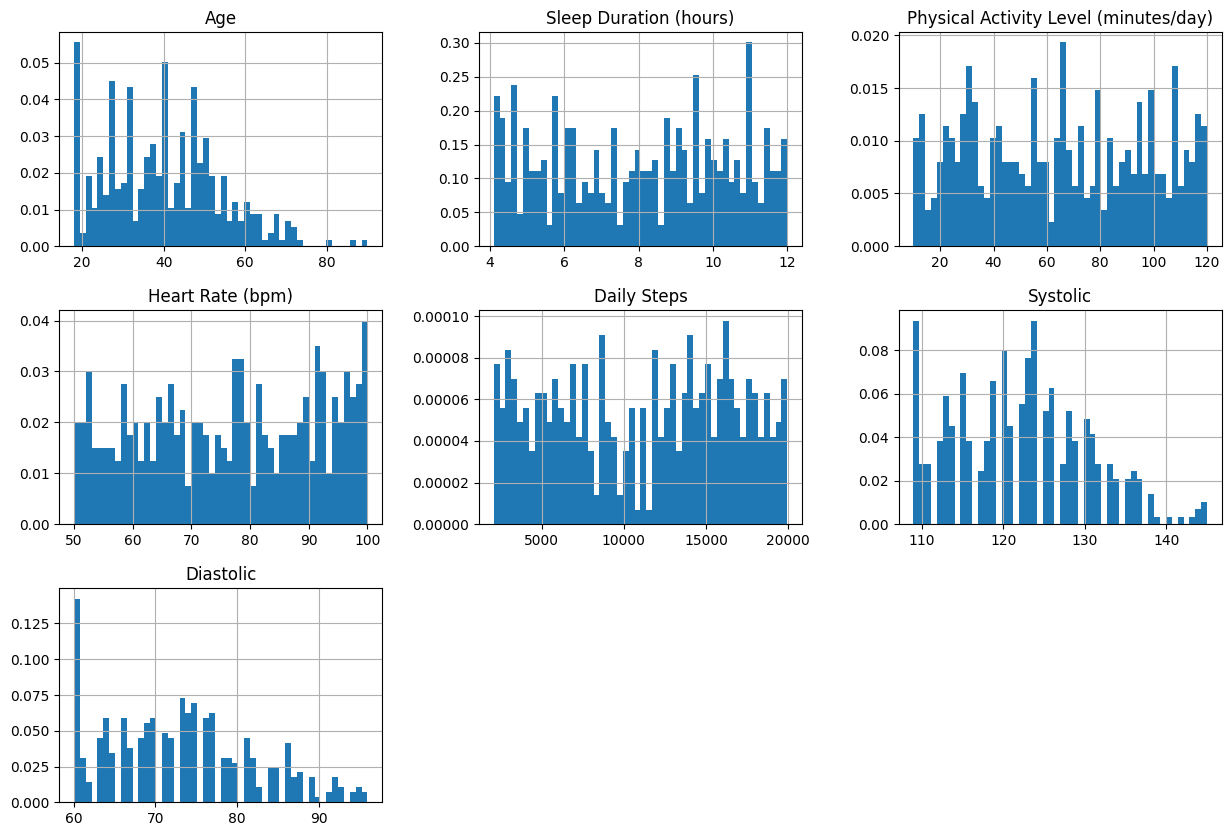

In [23]:
df.hist(bins=50, figsize=(15,10),density=True)

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

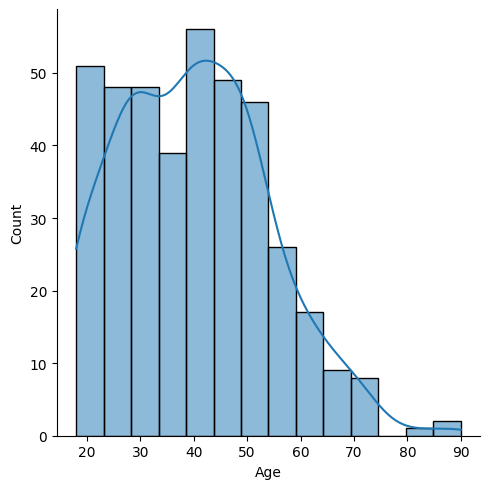

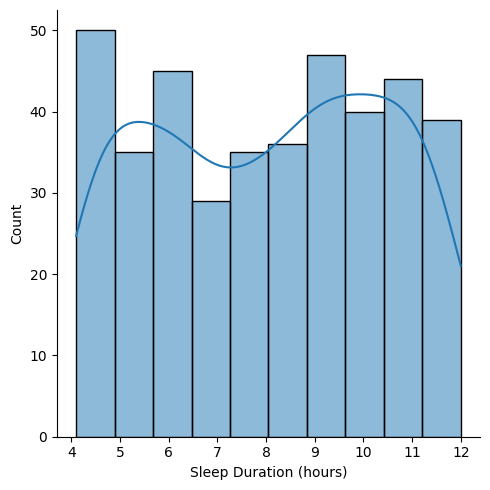

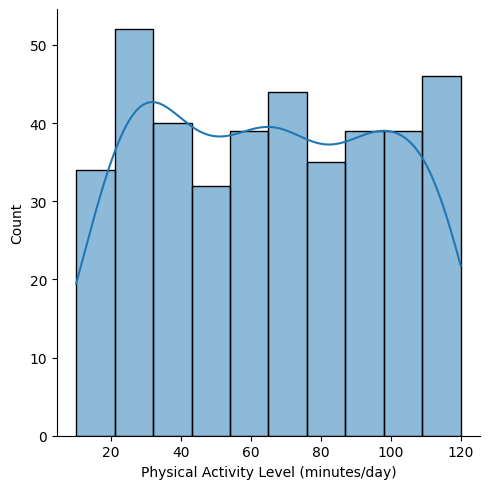

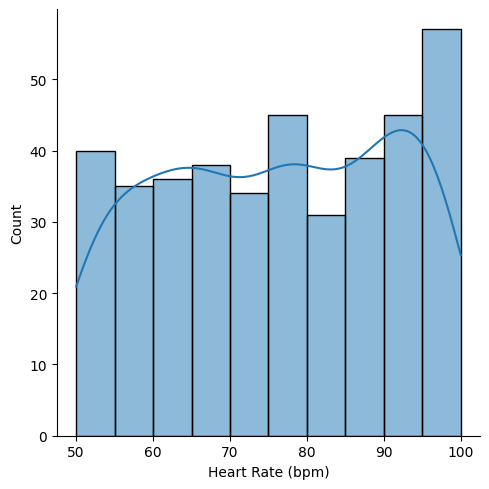

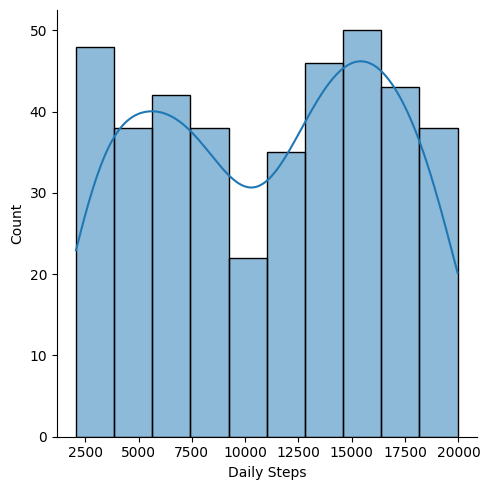

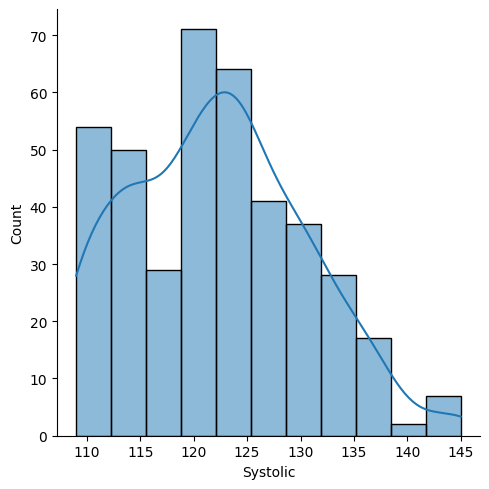

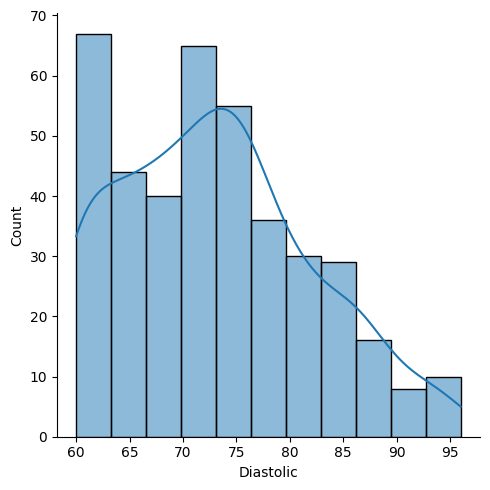

In [24]:
import seaborn as sns
scale_col=df.select_dtypes(include=['int64','float64'])
x=scale_col
for col in scale_col:
    sns.displot(data=df[col],kde=True,label=col)
plt.tight_layout()
plt.show()

H0:Normal dağılmıştır
H1: Normal dağılmamıştır 

In [25]:
import scipy.stats as stats
scale_col=df.select_dtypes(include=['int64','float64'])
for col in scale_col:
    stat,p_value=stats.shapiro(df[col])
    print(f"{col} için p_value {p_value}")
    if p_value < 0.05:
        print("H0 reddedilir. Normal dağılım göstermemektedir")
    else :
        print("H0 kabul edilir. Normal dağılım göstermektedir")
    

Age için p_value 9.903226774899313e-07
H0 reddedilir. Normal dağılım göstermemektedir
Sleep Duration (hours) için p_value 3.122426457570263e-11
H0 reddedilir. Normal dağılım göstermemektedir
Physical Activity Level (minutes/day) için p_value 2.2917737052139686e-10
H0 reddedilir. Normal dağılım göstermemektedir
Heart Rate (bpm) için p_value 6.306588519117552e-11
H0 reddedilir. Normal dağılım göstermemektedir
Daily Steps için p_value 1.6708266317414072e-11
H0 reddedilir. Normal dağılım göstermemektedir
Systolic için p_value 2.4936060214422226e-06
H0 reddedilir. Normal dağılım göstermemektedir
Diastolic için p_value 1.4433620881437541e-08
H0 reddedilir. Normal dağılım göstermemektedir


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 13 columns):
 #   Column                                 Non-Null Count  Dtype   
---  ------                                 --------------  -----   
 0   Gender                                 400 non-null    category
 1   Age                                    400 non-null    int64   
 2   Occupation                             400 non-null    category
 3   Sleep Duration (hours)                 400 non-null    float64 
 4   Quality of Sleep (scale: 1-10)         400 non-null    category
 5   Physical Activity Level (minutes/day)  400 non-null    int64   
 6   Stress Level (scale: 1-10)             400 non-null    category
 7   BMI Category                           400 non-null    category
 8   Heart Rate (bpm)                       400 non-null    int64   
 9   Daily Steps                            400 non-null    int64   
 10  Sleep Disorder                         400 non-null    categor

çoklu cor ve heatmap grafik

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

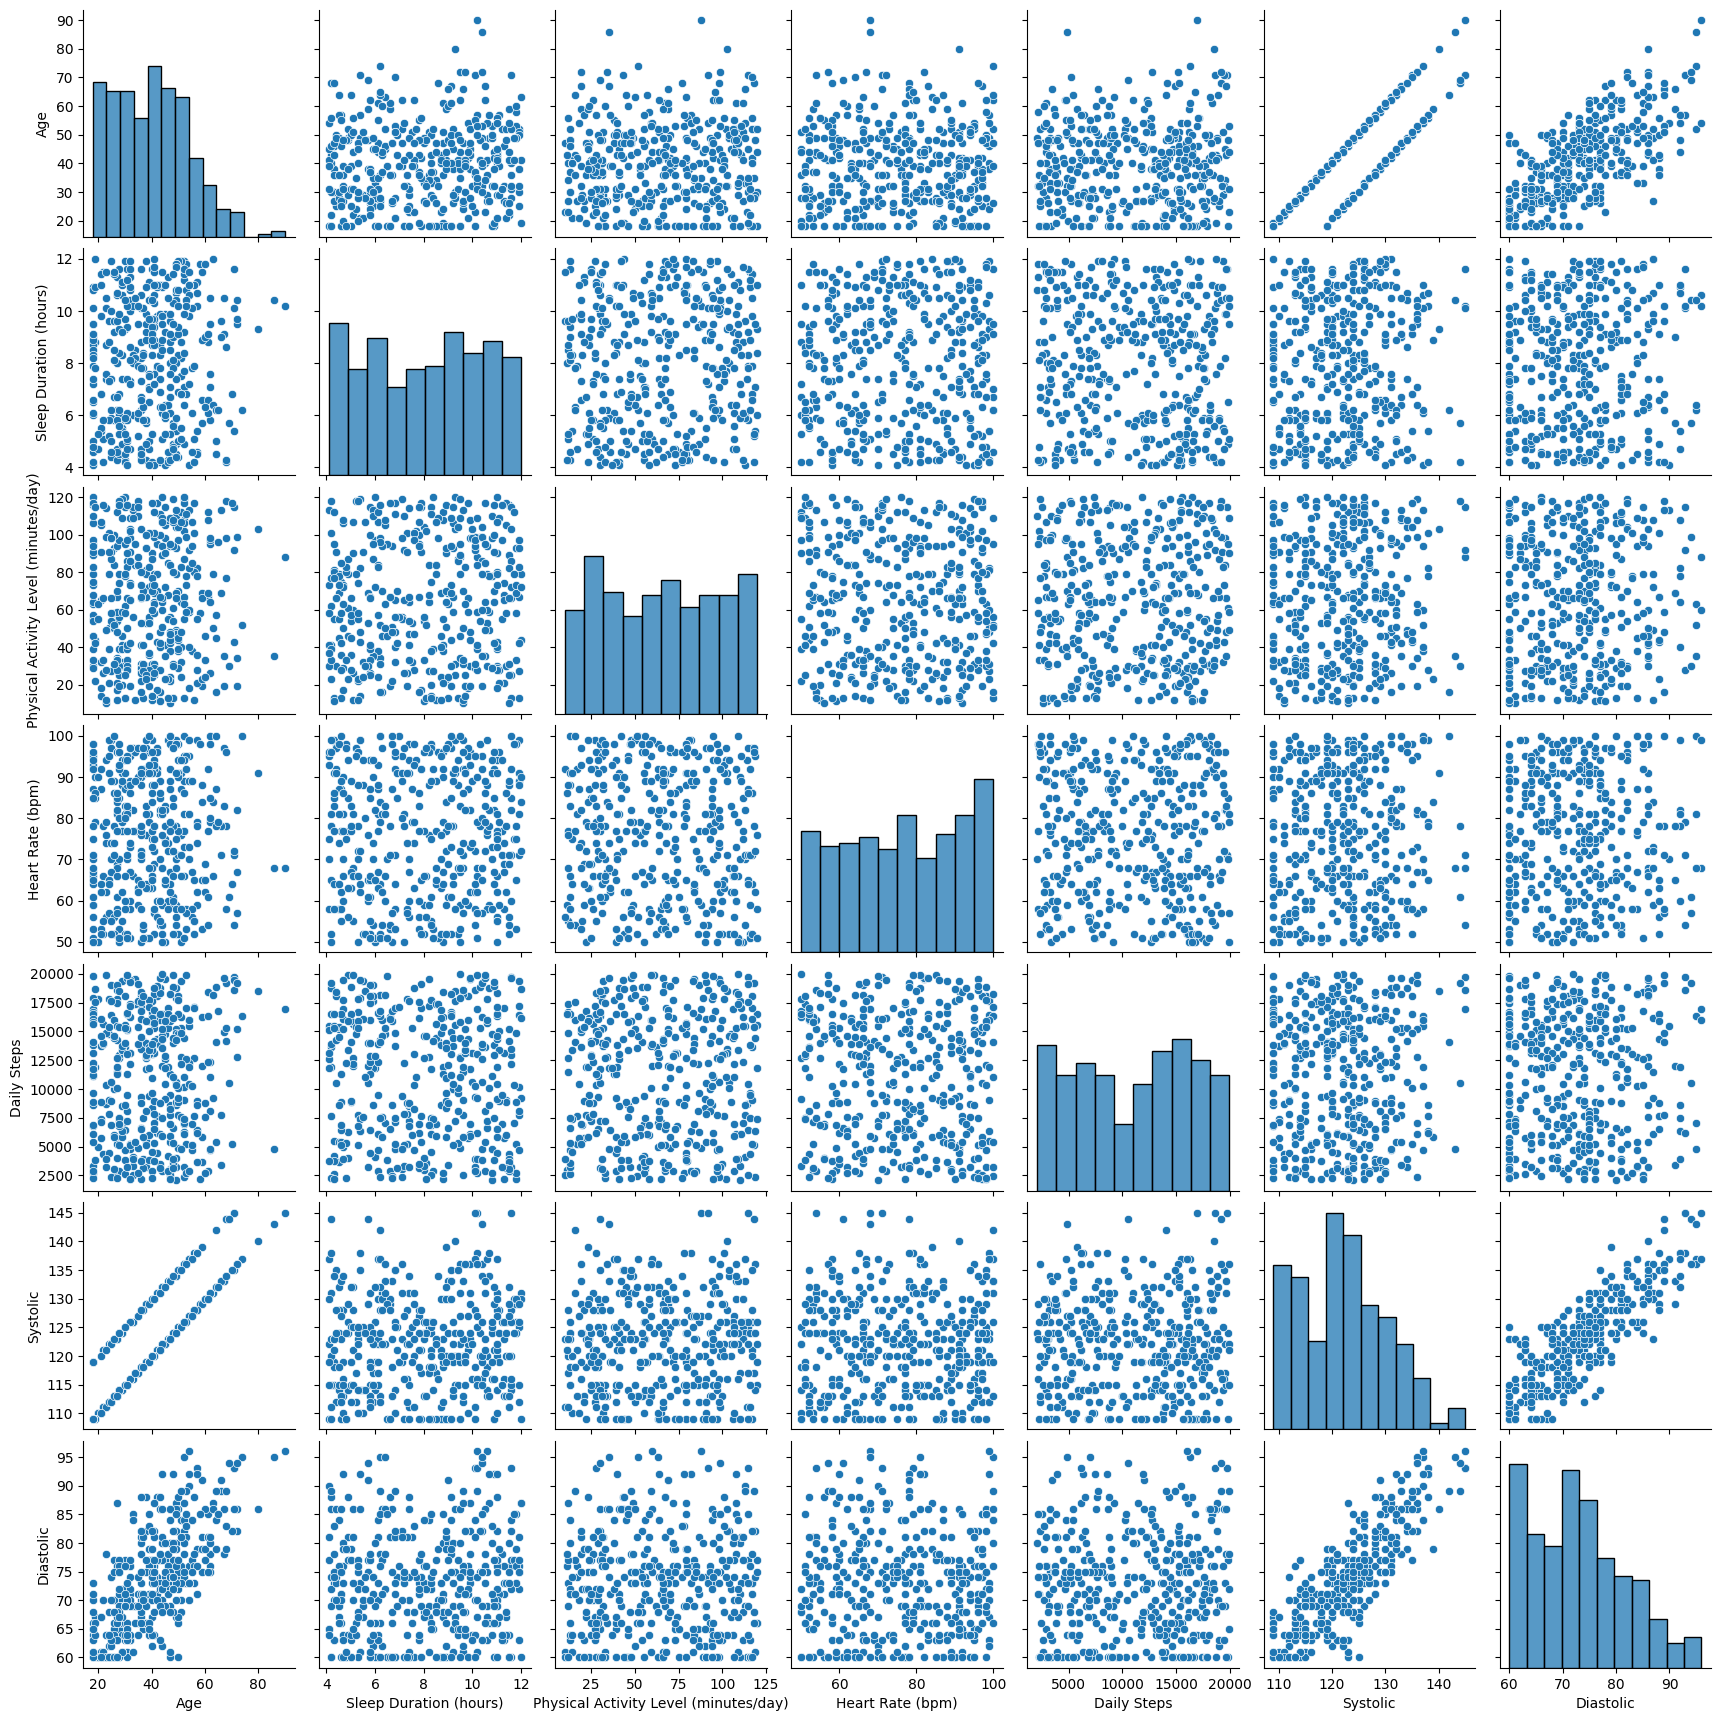

In [27]:
import seaborn as sns 
sns.pairplot(scale_col)

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


<Axes: xlabel='Gender', ylabel='Sleep Duration (hours)'>

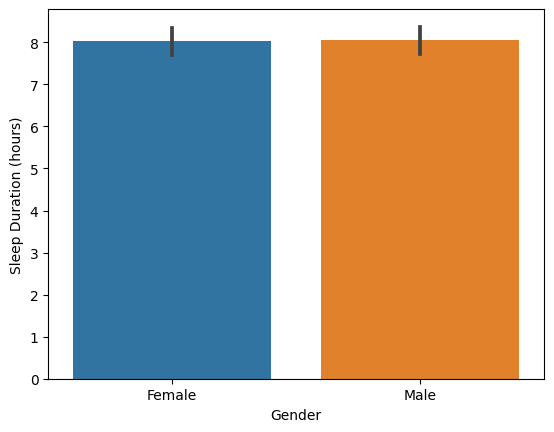

In [28]:
#cinsiyete göre uyku saati arasında fark var mı
sns.barplot(df,x='Gender',y='Sleep Duration (hours)')

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


<Axes: xlabel='Gender', ylabel='Physical Activity Level (minutes/day)'>

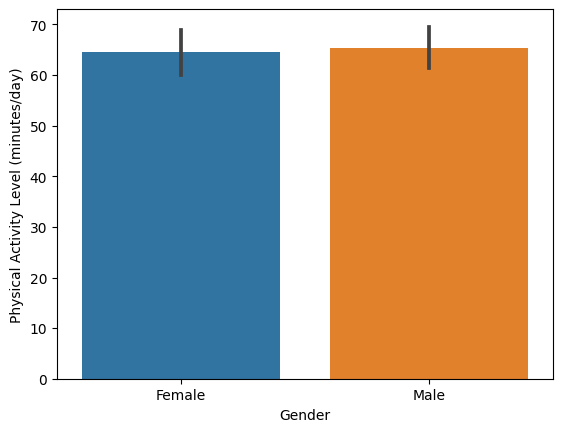

In [29]:
#cinisyete göre Physical Activity Level (minutes/day) fark var mı
sns.barplot(df,x='Gender',y='Physical Activity Level (minutes/day)')

In [30]:
#günlk adım sayısı cinisiyete göre
## uyku saati ve gğnlük adımın dağılımında bişi var yani kategor görmek ben
#günlük adım sayısı yaşa göre
#günlük adım syaısı ve fiziksel aktivite
#kalp atılı ve tansiyon vs
#....yaşa göre uyku süresinde fark var mı
#...yaşa göre uyku kalitesinde ve ya stres seviyesinde fark var mı
#uyku kalitesi ve stres seviyesinin ilişkisi
#fiziksel aktivteinni uyku süresine etkisi
#....Bmı ve cinsiyet göre farkı
#.....Bmı ve fiziksel aktivite ilişkisis
#.....bmı ve uyku süresi
#yaş ,cinsiyet,bmı, aktivite süewis,uyku saatine ilişkisi
#kalp atışı ve tanisyon uyku kalitesine etkisi
#stres seviyesinin uyku kalitesine ve süresğne etkisi
#iş durmunun bmı etkisi
#iş durmunun fiizksel aktiviteye etkisi
# iş durmu fiizklse aktivite ve bmı ilişkiler
#uyku kalitesi ve uyku süresi ilişksis
# bütün değişkenlerin uyku bozuklarıla ilişkisi 
#sınıflandırme
#regeesyon ve kümele için bişibulursan onları fa yap

<Axes: xlabel='BMI Category', ylabel='count'>

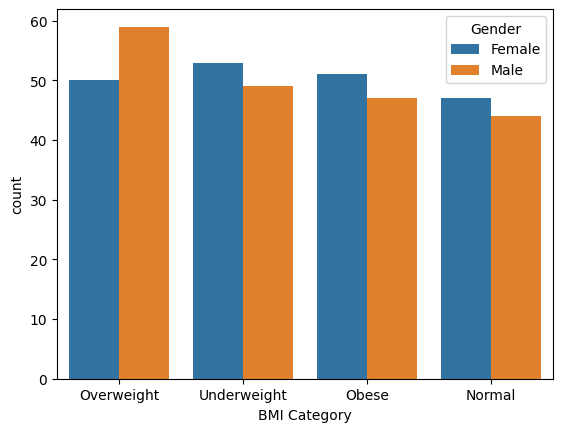

In [31]:
sns.countplot(df,hue='Gender', x='BMI Category',)

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


<Axes: xlabel='BMI Category', ylabel='Physical Activity Level (minutes/day)'>

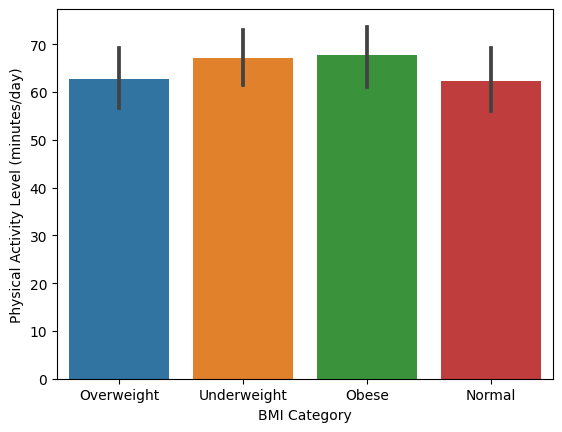

In [32]:
sns.barplot(df,x='BMI Category',y='Physical Activity Level (minutes/day)')

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


<Axes: xlabel='BMI Category', ylabel='Sleep Duration (hours)'>

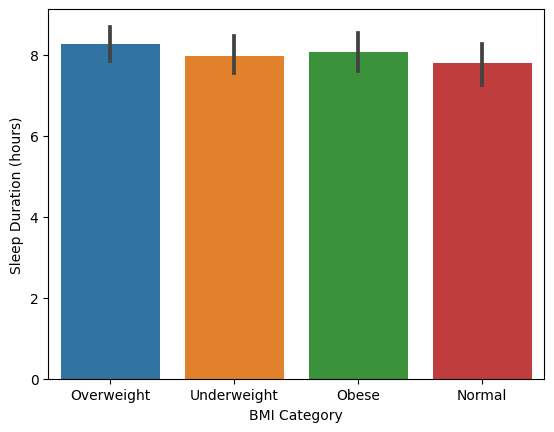

In [33]:
sns.barplot(df, x='BMI Category', y='Sleep Duration (hours)')

<Axes: xlabel='Quality of Sleep (scale: 1-10)', ylabel='Sleep Duration (hours)'>

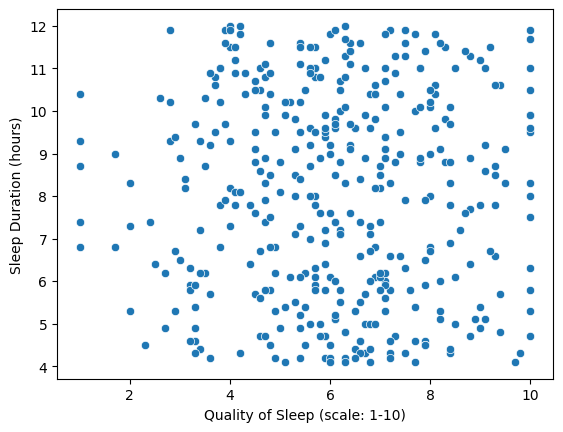

In [34]:
sns.scatterplot(df,x='Quality of Sleep (scale: 1-10)',y='Sleep Duration (hours)')

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


<Axes: xlabel='Gender', ylabel='Daily Steps'>

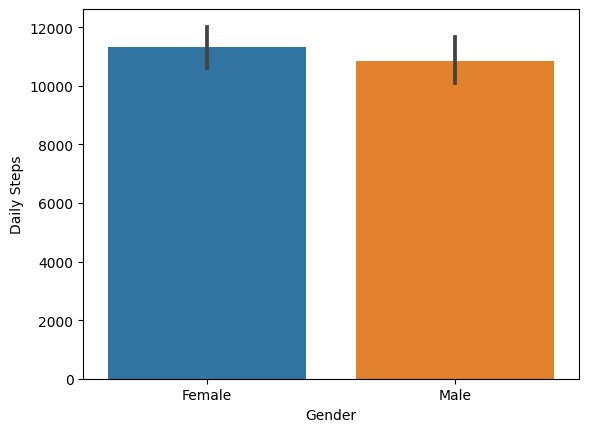

In [35]:
sns.barplot(df,x='Gender',y='Daily Steps')

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


<Axes: xlabel='Quality of Sleep (scale: 1-10)', ylabel='Age'>

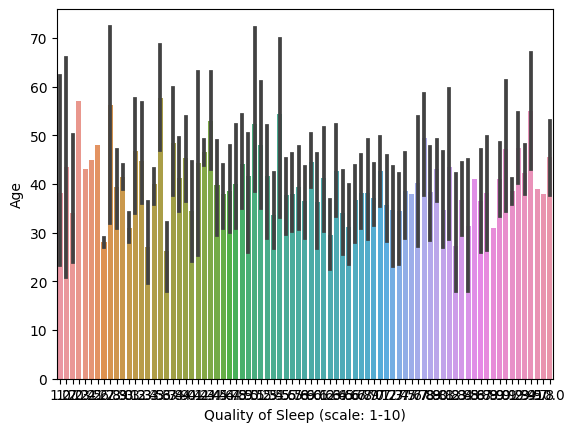

In [36]:
sns.barplot(df,y='Age',x='Quality of Sleep (scale: 1-10)')

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


<Axes: xlabel='Stress Level (scale: 1-10)', ylabel='Age'>

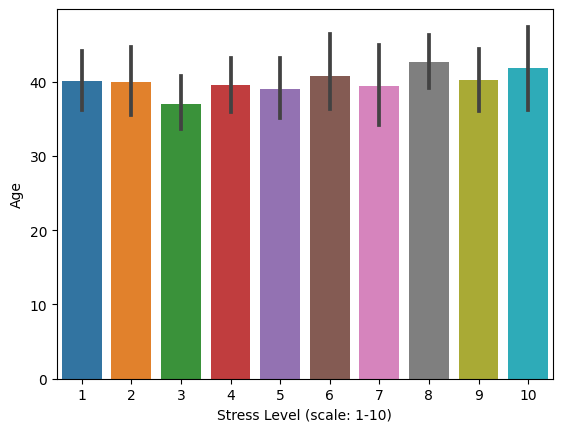

In [37]:
sns.barplot(df,y='Age',x='Stress Level (scale: 1-10)')